In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm3
import pymc4 as pm4
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

In [2]:
experiments = np.array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
@pm4.model
def model():
    prob = yield pm4.Uniform('p', 0., 1.)
    ll = yield pm4.Bernoulli('ll', prob, observed=experiments)

In [4]:
trace = pm4.fit(model())

Instructions for updating:
The signature for `trace_fn`s passed to `minimize` has changed. Trace functions now take a single `traceable_quantities` argument, which is a `tfp.math.MinimizeTraceableQuantities` namedtuple containing `traceable_quantities.loss`, `traceable_quantities.gradients`, etc. Please update your `trace_fn` definition.


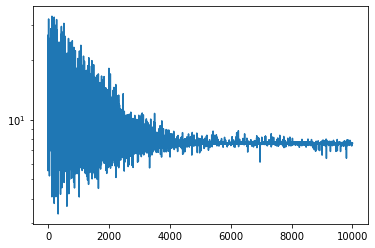

In [5]:
plt.plot(trace.losses)
plt.yscale('log')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x147831650>,
      dtype=object)

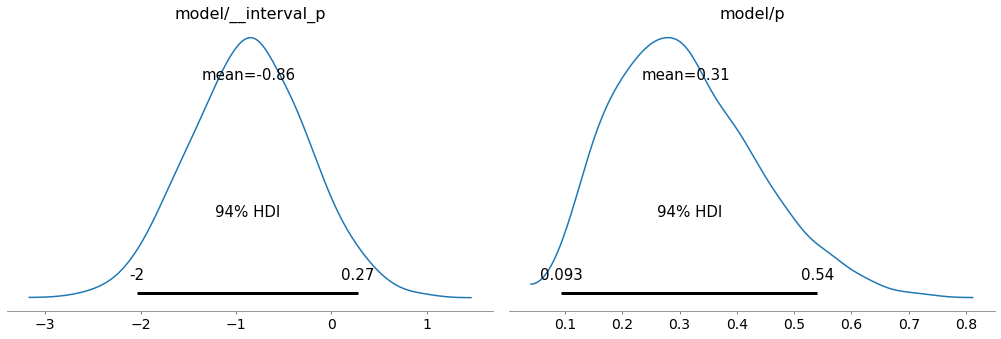

In [6]:
az.plot_posterior(trace.approximation.sample(10000))